in [1.510041952, 1.510041952, 1.510041952, 1.510041952, 1.510041952]
out:  [7.537000179, 7.521999836, 7.504000187, 7.493999958, 7.468999863]


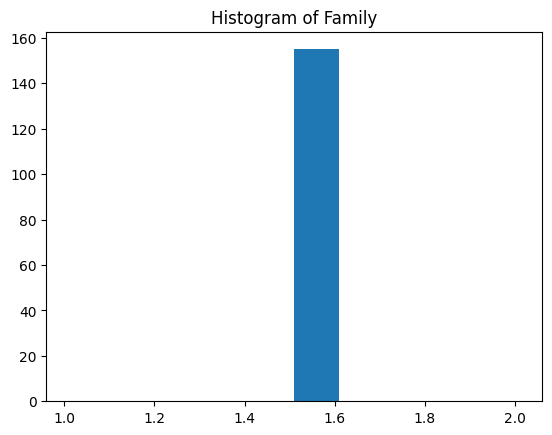

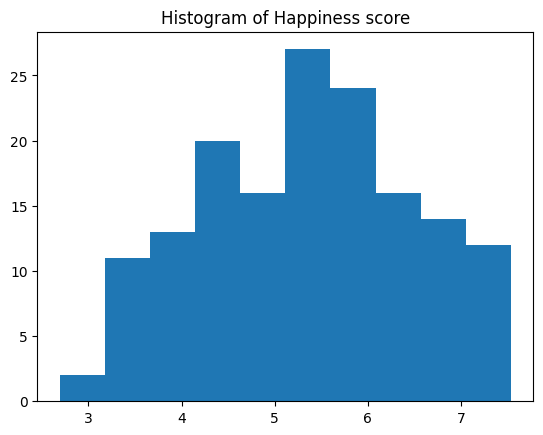

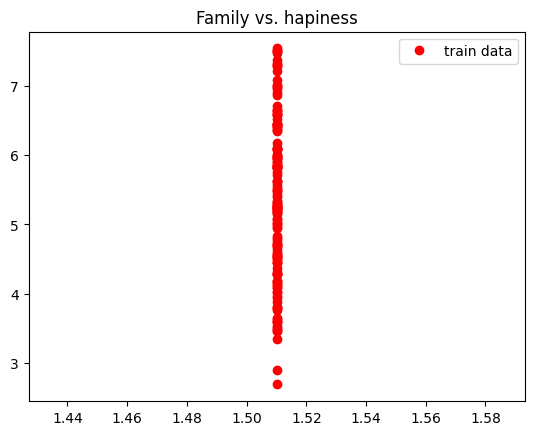

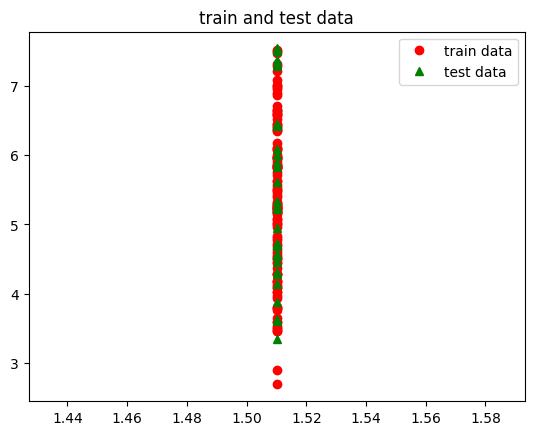

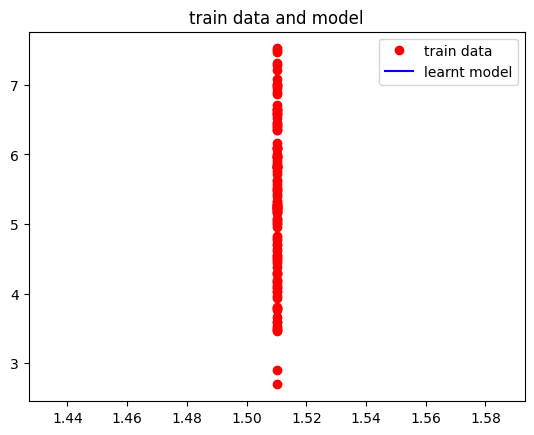

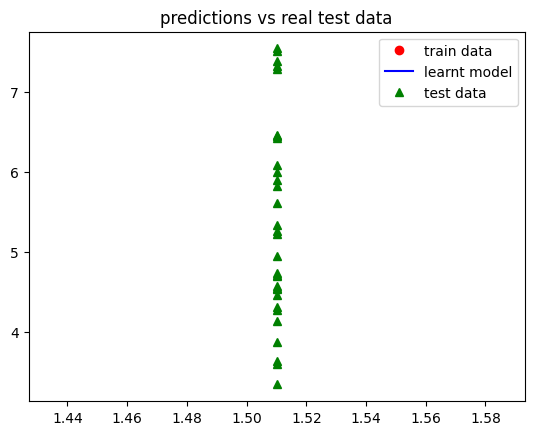

prediction error (manual):  1.488969965516146
prediction error (tool):  1.488969965516146


In [3]:
import csv  
import os  
import matplotlib.pyplot as plt  
import numpy as np  
import pandas as pd 
from sklearn import linear_model  
from sklearn.metrics import mean_squared_error  

# Functie pentru a incarca datele dintr-un fisier CSV
def loadData(fileName, inputVariabName, outputVariabName):
    data = []  
    dataNames = []  
    with open(fileName) as csv_file:  
        csv_reader = csv.reader(csv_file, delimiter=",")  
        line_count = 0 
        for row in csv_reader:  
            if line_count == 0:  
                dataNames = row  
            else: 
                data.append(row)  
            line_count += 1  
            
    selectedVariable = dataNames.index(inputVariabName)  
    
    inputs = [float(data[i][selectedVariable]) for i in range(len(data))]  
    
    selectedOutput = dataNames.index(outputVariabName)  
    
    outputs = [float(data[i][selectedOutput]) for i in range(len(data))]  
    
    return inputs, outputs  

# Setam directorul curent si calea catre fisier
cDir = os.getcwd()  
filePath = os.path.join(cDir, '../Data', 'v1_world-happiness-report-2017.csv')  

inputs, outputs = loadData(filePath, 'Family', 'Happiness.Score')  
print('in', inputs[:5])  
print('out: ', outputs[:5])  

def plotDataHistogram(x, variableName):
    n, bins, patches = plt.hist(x, 10)  
    plt.title('Histogram of ' + variableName) 
    plt.show()  
    
plotDataHistogram(inputs, 'Family')  
plotDataHistogram(outputs, 'Happiness score')  

def plotData(x1, y1, x2 = None, y2 = None, x3 = None, y3 = None, title = None):
    plt.plot(x1, y1, 'ro', label = 'train data')  
    if (x2):  
        plt.plot(x2, y2, 'b-', label = 'learnt model')  
    if (x3):  
        plt.plot(x3, y3, 'g^', label = 'test data')  
    plt.title(title)  
    plt.legend()  
    plt.show() 

# Verificam liniaritatea dintre familie si fericire
plotData(inputs, outputs, [], [], [], [], 'Family vs. hapiness')  

# Impartim datele in antrenament (80%) si testare (20%)
np.random.seed(5)  
indexes = [i for i in range(len(inputs))]  

trainSample = np.random.choice(indexes, int(0.8 * len(inputs)), replace = False)  
validationSample = [i for i in indexes if not i in trainSample]  # Restul pentru testare
trainInputs = [inputs[i] for i in trainSample]  
trainOutputs = [outputs[i] for i in trainSample] 
validationInputs = [inputs[i] for i in validationSample]  
validationOutputs = [outputs[i] for i in validationSample]  

# Afisam datele de antrenament si testare
plotData(trainInputs, trainOutputs, [], [], validationInputs, validationOutputs, "train and test data")

# Antrenam modelul de regresie liniara
xx = [[el] for el in trainInputs]   
regressor = linear_model.LinearRegression()  
regressor.fit(xx, trainOutputs)  
w0, w1 = regressor.intercept_, regressor.coef_  

# Cream puncte pentru a afisa modelul invatat
noOfPoints = 1000  
xref = []  
val = min(trainInputs)  
step = (max(trainInputs) - min(trainInputs)) / noOfPoints  
for i in range(1, noOfPoints):  
    xref.append(val)  # Adaugam valoarea curenta
    val += step  # Incrementam valoarea
yref = [w0 + w1 * el for el in xref]  
plotData(trainInputs, trainOutputs, xref, yref, [], [], title = "train data and model") 

# Facem predictii pentru datele de testare
computedValidationOutputs = regressor.predict([[x] for x in validationInputs])  # Predictii folosind modelul
plotData([], [], validationInputs, computedValidationOutputs, validationInputs, validationOutputs, "predictions vs real test data")  

# Calculam eroarea predictiilor manual
error = 0.0  
for t1, t2 in zip(computedValidationOutputs, validationOutputs):  # Parcurgem predictiile si valorile reale
    error += (t1 - t2) ** 2  # Adaugam patratul diferentei
error = error / len(validationOutputs)  
print("prediction error (manual): ", error)  

# Calculam eroarea predictiilor cu unealta
error = mean_squared_error(validationOutputs, computedValidationOutputs)  
print("prediction error (tool): ", error)  

in:  [1.616463184, 1.482383013, 1.48063302, 1.564979553, 1.443571925]
in2:  [0.635422587, 0.626006722, 0.627162635, 0.620070577, 0.617950857]
out:  [7.537000179, 7.521999836, 7.504000187, 7.493999958, 7.468999863]


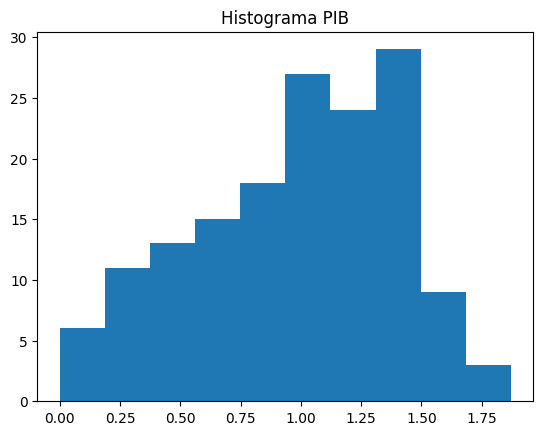

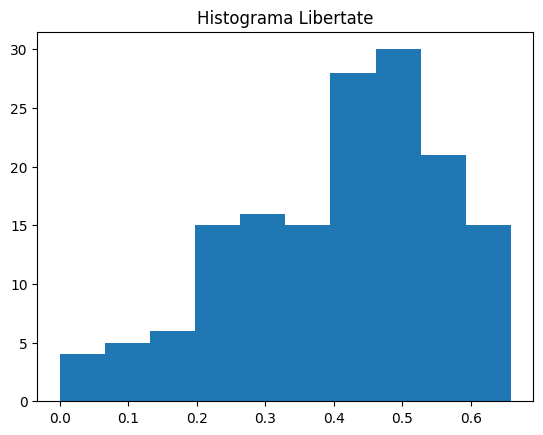

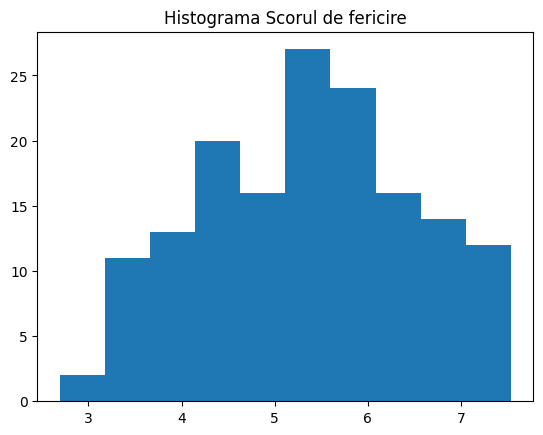

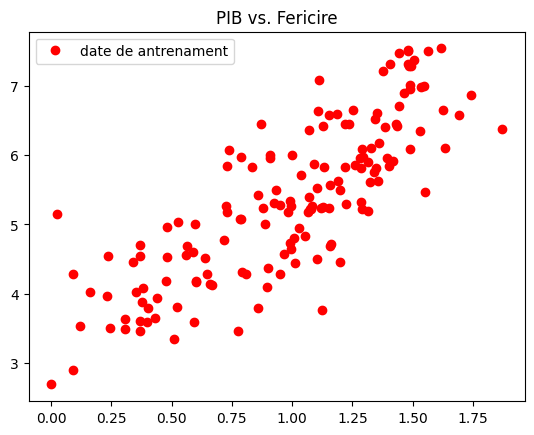

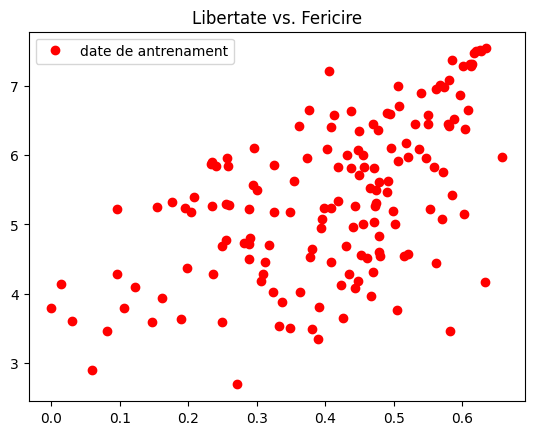

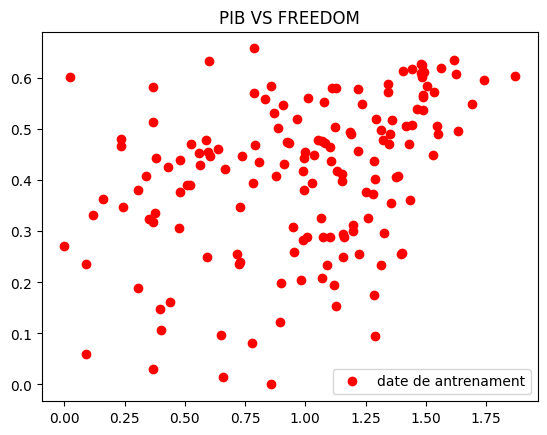

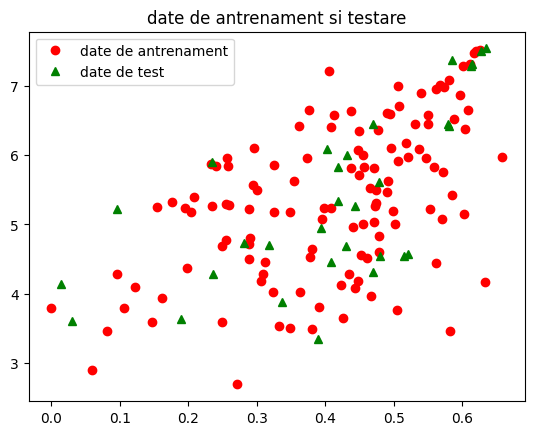

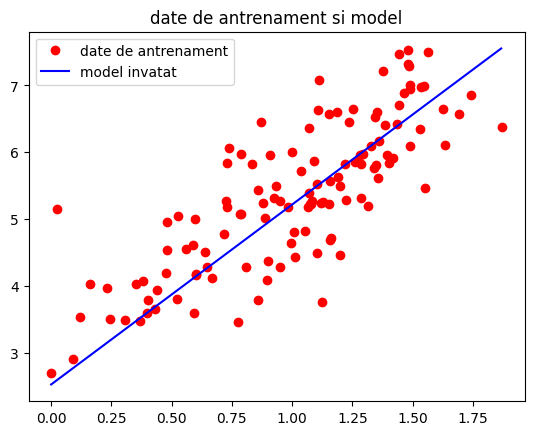

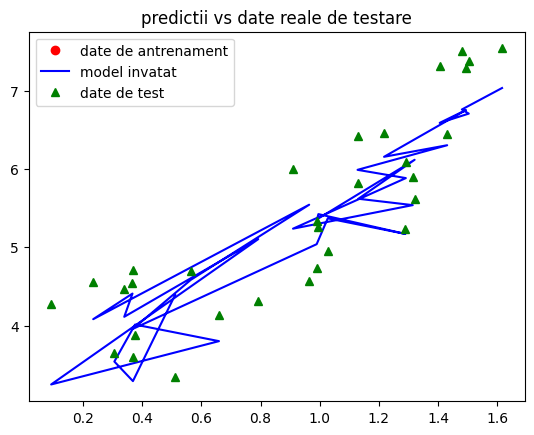

eroare de predictie:  0.2778267436200108


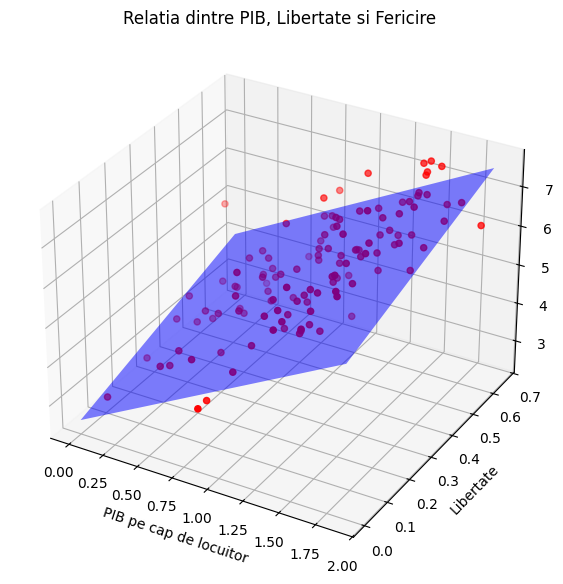

In [6]:
from mpl_toolkits.mplot3d import Axes3D  

# Functie pentru a incarca datele dintr-un fisier CSV
def loadData(fileName, inputVariabName1, inputvariable2, outputVariabName):
    data = []  
    dataNames = []  
    with open(fileName) as csv_file:  
        csv_reader = csv.reader(csv_file, delimiter=",")  
        line_count = 0  
        for row in csv_reader:  
            if line_count == 0:  
                dataNames = row  
            else:  
                data.append(row)
            line_count += 1 
            
    
    selectedVariable = dataNames.index(inputVariabName1)  
    inputs = [float(data[i][selectedVariable]) for i in range(len(data))] 
    selectedVariable2 = dataNames.index(inputvariable2)  
    inputs2 = [float(data[i][selectedVariable2]) for i in range(len(data))] 
    selectedOutput = dataNames.index(outputVariabName)  
    outputs = [float(data[i][selectedOutput]) for i in range(len(data))]  
    
    return inputs, inputs2, outputs  

cDir = os.getcwd()  
filePath = os.path.join(cDir, '../Data', 'v1_world-happiness-report-2017.csv')  

# Incarcam datele din fisier
inputs, inputs2, outputs = loadData(filePath, 'Economy..GDP.per.Capita.', 'Freedom', 'Happiness.Score')
print('in: ', inputs[:5])  
print('in2: ', inputs2[:5])  
print('out: ', outputs[:5])  


def plotDataHistogram(x, variableName):
    n, bins, patches = plt.hist(x, 10)  
    plt.title('Histograma ' + variableName)  
    plt.show()  

# Cream histogramele pentru variabile
plotDataHistogram(inputs, 'PIB')  
plotDataHistogram(inputs2, 'Libertate')  
plotDataHistogram(outputs, 'Scorul de fericire')  

# Crearea graficelor de dispersie
def plotData(x1, y1, x2 = None, y2 = None, x3 = None, y3 = None, title = None):
    plt.plot(x1, y1, 'ro', label = 'date de antrenament')  
    if (x2):  
        plt.plot(x2, y2, 'b-', label = 'model invatat')  
    if (x3):  
        plt.plot(x3, y3, 'g^', label = 'date de test')  
    plt.title(title)  
    plt.legend()  
    plt.show()  

# Verificam liniaritatea dintre variabile
plotData(inputs, outputs, [], [], [], [], 'PIB vs. Fericire')  
plotData(inputs2, outputs, [], [], [], [], 'Libertate vs. Fericire')  
plotData(inputs, inputs2, [],[],[],[], 'PIB VS FREEDOM')

# Impartim datele in antrenament (80%) si testare (20%)
np.random.seed(5)  

indexes = [i for i in range(len(inputs))]  

trainSample = np.random.choice(indexes, int(0.8 * len(inputs)), replace = False) 
validationSample = [i for i in indexes if not i in trainSample]  

trainInputs = [inputs[i] for i in trainSample]  
trainInputs2 = [inputs2[i] for i in trainSample] 
trainOutputs = [outputs[i] for i in trainSample]  

validationInputs = [inputs[i] for i in validationSample]  
validationInputs2 = [inputs2[i] for i in validationSample]  
validationOutputs = [outputs[i] for i in validationSample]  

# Afisam datele de antrenament si testare
plotData(trainInputs2, trainOutputs, [], [], validationInputs2, validationOutputs, "date de antrenament si testare")

# Antrenam modelul de regresie liniara
xx = [[el, el2] for el, el2 in zip(trainInputs, trainInputs2)] 

regressor = linear_model.LinearRegression()  
regressor.fit(xx, trainOutputs)  
w0, w1, w2 = regressor.intercept_, regressor.coef_[0], regressor.coef_[1]  

# Cream puncte pentru a afisa modelul invatat
noOfPoints = 1000  
xref = []  # Lista pentru valorile PIB-ului
xref2 = []  
val1 = min(trainInputs)  
val2 = min(trainInputs2)  
step1 = (max(trainInputs) - min(trainInputs)) / noOfPoints  
step2 = (max(trainInputs2) - min(trainInputs2)) / noOfPoints  

for i in range(1, noOfPoints):  # Generam punctele
    xref.append(val1)  
    xref2.append(val2)  
    val1 += step1  
    val2 += step2  

yref = [w0 + w1 * el1 + w2 * el2 for el1, el2 in zip(xref, xref2)]  # Calculam outputurile modelului
plotData(trainInputs, trainOutputs, xref, yref, [], [], title="date de antrenament si model")

# Facem predictii pentru datele de testare
computedValidationOutputs = regressor.predict([[x1, x2] for x1, x2 in zip(validationInputs, validationInputs2)])
plotData([], [], validationInputs, computedValidationOutputs, validationInputs, validationOutputs, "predictii vs date reale de testare")

# Calculam eroarea predictiilor
error = mean_squared_error(validationOutputs, computedValidationOutputs)
print("eroare de predictie: ", error) 

# Cream diagrama 3D 
fig = plt.figure(figsize=(10, 7)) 
ax = fig.add_subplot(111, projection='3d') 

# Afisam datele 
ax.scatter(trainInputs, trainInputs2, trainOutputs, c='r', marker='o', label='Date de antrenament')

# Cream o suprafata pentru modelul invatat
X = np.linspace(min(trainInputs), max(trainInputs), 100) 
Y = np.linspace(min(trainInputs2), max(trainInputs2), 100)  
X, Y = np.meshgrid(X, Y)  
Z = w0 + w1 * X + w2 * Y  

ax.plot_surface(X, Y, Z, alpha=0.5, rstride=100, cstride=100, color='b', label='Model invatat')

ax.set_xlabel('PIB pe cap de locuitor') 
ax.set_ylabel('Libertate') 
ax.set_zlabel('Scor de fericire')  
ax.set_title('Relatia dintre PIB, Libertate si Fericire')  

plt.savefig('3d_happiness_plot.png')

Valori PIB (primele 5): [1.616463184, 1.482383013, 1.48063302, 1.564979553, 1.443571925]
Valori libertate (primele 5): [0.635422587, 0.626006722, 0.627162635, 0.620070577, 0.617950857]
Scoruri fericire (primele 5): [7.537000179, 7.521999836, 7.504000187, 7.493999958, 7.468999863]


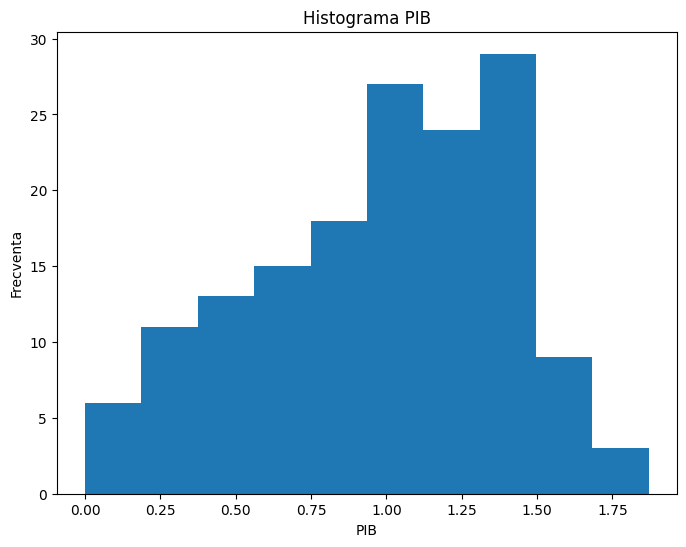

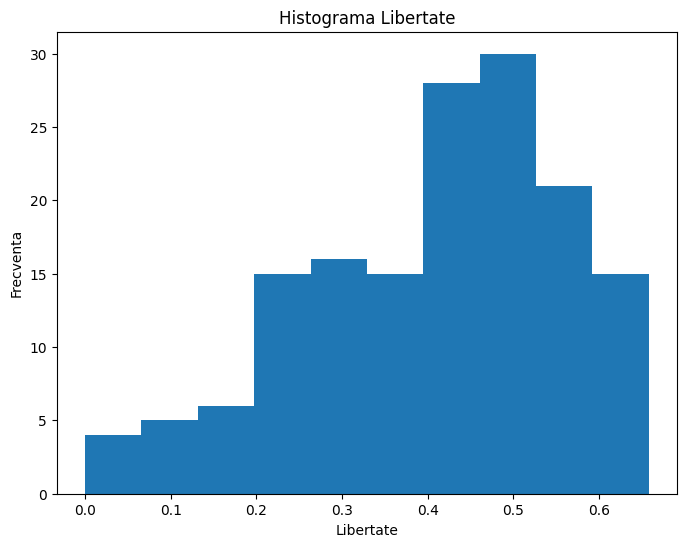

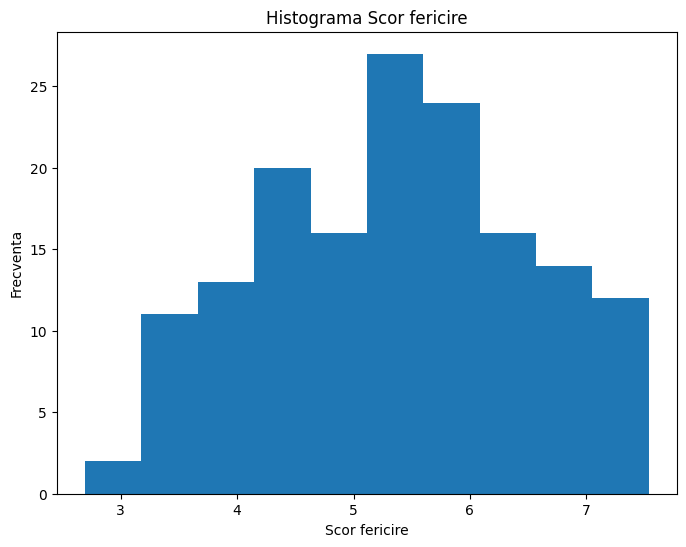

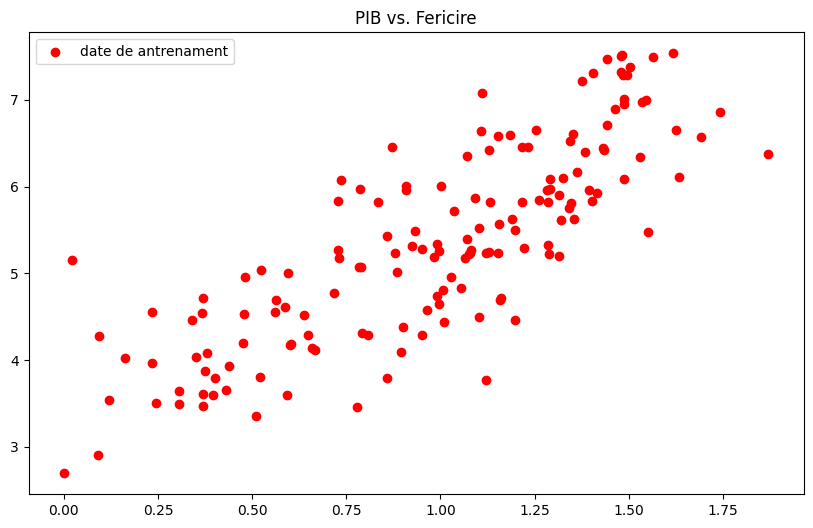

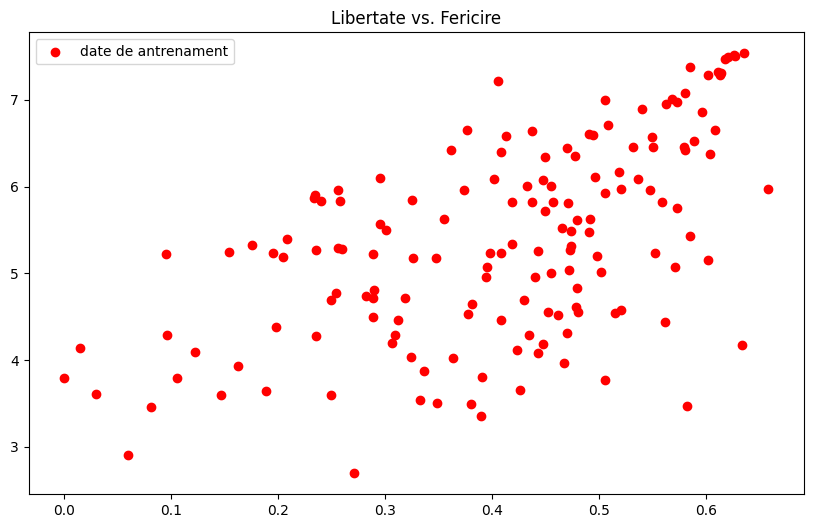

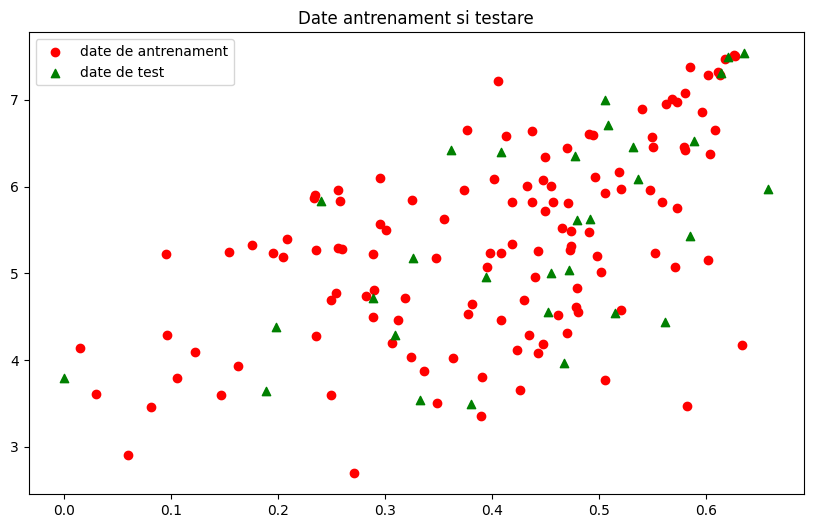

50.8085155499357


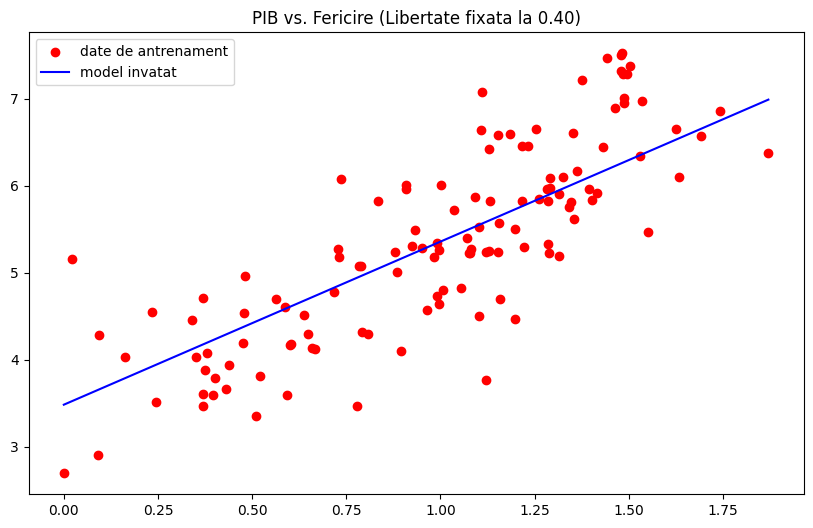

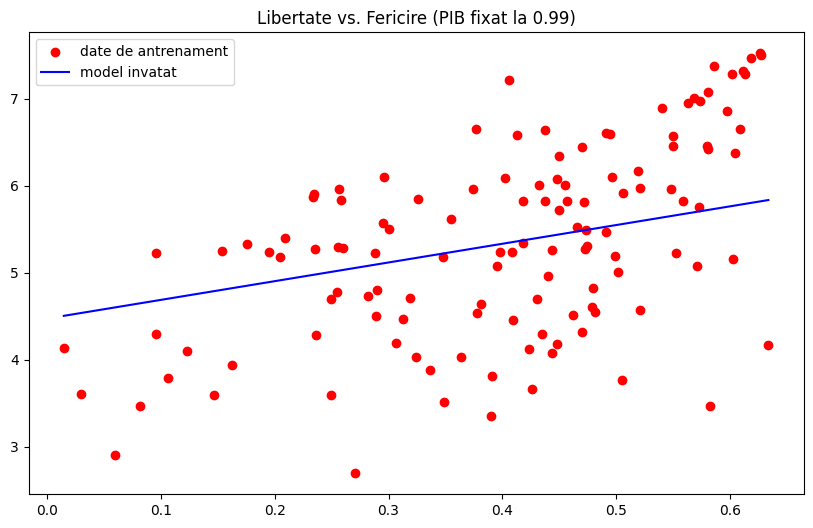

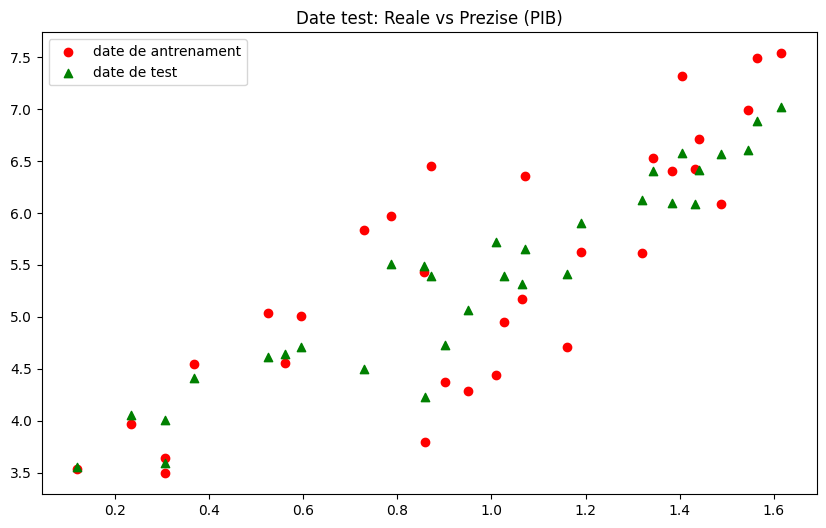

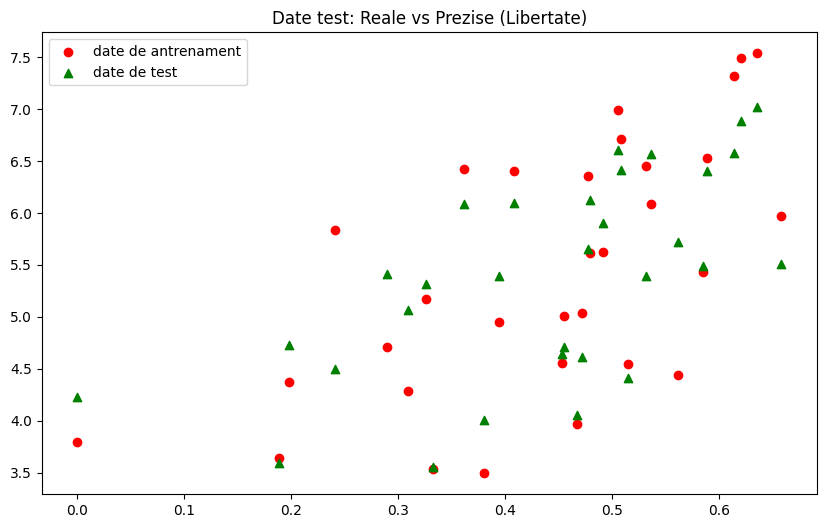

Eroare de predictie: 0.3118


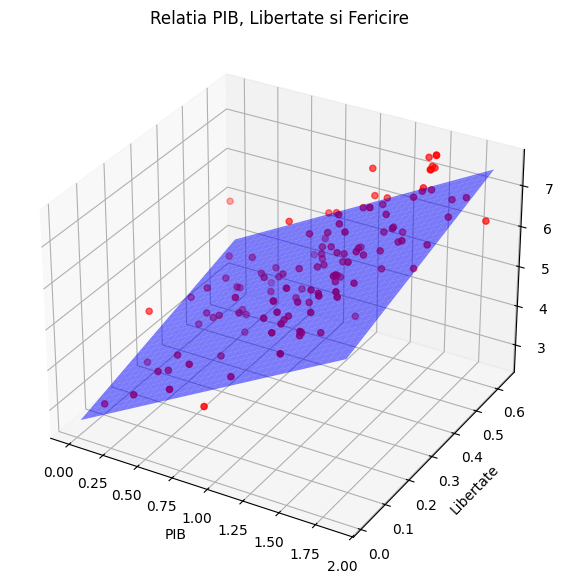

In [1]:
import csv  
import math  
import random  
import matplotlib.pyplot as plt  
from mpl_toolkits.mplot3d import Axes3D  

# Functie pentru a incarca datele dintr-un fisier CSV
def load_data(file_path, input_var1, input_var2, output_var):
    data = []  
    data_names = [] 
    
    try:
        with open(file_path) as csv_file:  
            csv_reader = csv.reader(csv_file, delimiter=",")  
            line_count = 0  
            for row in csv_reader: 
                if line_count == 0:  
                    data_names = row  
                else:  
                    data.append(row)  
                line_count += 1  
                
        
        input1_index = data_names.index(input_var1)  
        input2_index = data_names.index(input_var2)  
        output_index = data_names.index(output_var)  
        
        
        inputs1 = [float(data[i][input1_index]) for i in range(len(data))]  
        inputs2 = [float(data[i][input2_index]) for i in range(len(data))]  
        outputs = [float(data[i][output_index]) for i in range(len(data))]  
        
        return inputs1, inputs2, outputs  
    except Exception as e:
        print(f"Eroare la incarcarea datelor: {e}")  
        return [], [], []  

# Functie pentru a crea histograme ale datelor
def plot_histogram(x, variable_name):
    min_val = min(x)  
    max_val = max(x)  
    bin_width = (max_val - min_val) / 10  
    bins = [min_val + i * bin_width for i in range(11)]  
    
    plt.figure(figsize=(8, 6))  
    plt.hist(x, bins)  
    plt.title(f'Histograma {variable_name}')  
    plt.xlabel(variable_name)  
    plt.ylabel('Frecventa')  
    plt.show()  

# Functie pentru a crea grafice de dispersie
def plot_data(x1, y1, x2=None, y2=None, x3=None, y3=None, title=None):
    plt.figure(figsize=(10, 6)) 
    
    if x1 and y1:  # Daca exista date de antrenament
        plt.scatter(x1, y1, color='red', label='date de antrenament')  # 
    
    if x2 and y2:  # Daca exista date pentru modelul invatat
        plt.plot(x2, y2, 'b-', label='model invatat')  
    
    if x3 and y3:  # Daca exista date de test
        plt.scatter(x3, y3, color='green', marker='^', label='date de test')  
    
    plt.title(title)  
    plt.legend()  
    plt.show()  

#regresie liniara 
class MultipleLinearRegression:
    def __init__(self):
        self.intercept_ = 0  
        self.coef_ = [0, 0]  
    
    def fit(self, X, y):
        n = len(X)  # Numarul de exemple
        
        mean_x1 = sum(X[i][0] for i in range(n)) / n  
        
        mean_x2 = sum(X[i][1] for i in range(n)) / n  
        
        mean_y = sum(y) / n  
        
        # Calculam coeficientii metoda celor mai mici patrate
        sum_x1_squared = 0 
        sum_x2_squared = 0  
        sum_x1_x2 = 0  
        sum_x1_y = 0 
        sum_x2_y = 0  
        
        for i in range(n):  
            # Centrarea datelor
            x1_centered = X[i][0] - mean_x1  
            x2_centered = X[i][1] - mean_x2  
            y_centered = y[i] - mean_y  
            
            # Suma patratelor deviatiilor fata de medie
            sum_x1_squared += x1_centered ** 2  
            sum_x2_squared += x2_centered ** 2  
            
            # Suma produselor (corelaita)
            sum_x1_x2 += x1_centered * x2_centered  
            sum_x1_y += x1_centered * y_centered  
            sum_x2_y += x2_centered * y_centered  
        
        # Rezolvam sistemul de ecuatii
        denominator = sum_x1_squared * sum_x2_squared - sum_x1_x2 ** 2  
        print("The denominator is: ", denominator)
        if denominator == 0:  
            print("Eroare: Sistemul este singular, nu se poate gasi solutie unica")
            return None
        
        w1 = (sum_x1_y * sum_x2_squared - sum_x2_y * sum_x1_x2) / denominator 
        w2 = (sum_x2_y * sum_x1_squared - sum_x1_y * sum_x1_x2) / denominator 
        w0 = mean_y - w1 * mean_x1 - w2 * mean_x2  
        
        self.intercept_ = w0  
        self.coef_ = [w1, w2]  
        
        return self
    
    def predict(self, X):
        
        return [self.intercept_ + self.coef_[0] * x[0] + self.coef_[1] * x[1] for x in X]  

def mean_squared_error(y_true, y_pred):
    n = len(y_true)  # Numarul de valori
    return sum((y_true[i] - y_pred[i]) ** 2 for i in range(n)) / n  

def main():

    file_path = 'v1_world-happiness-report-2017.csv'
    
    inputs1, inputs2, outputs = load_data(
        file_path, 
        'Economy..GDP.per.Capita.',  
        'Freedom',  
        'Happiness.Score'  
    )
    
    if not inputs1 or not inputs2 or not outputs:  
        print("Eroare la incarcarea datelor. Verifica fisierul.")
        return
    
    print('Valori PIB (primele 5):', inputs1[:5])  
    print('Valori libertate (primele 5):', inputs2[:5])  
    print('Scoruri fericire (primele 5):', outputs[:5])  
    
    
    plot_histogram(inputs1, 'PIB')  
    plot_histogram(inputs2, 'Libertate')  
    plot_histogram(outputs, 'Scor fericire')  
    
    plot_data(inputs1, outputs, None, None, None, None, 'PIB vs. Fericire')  
    plot_data(inputs2, outputs, None, None, None, None, 'Libertate vs. Fericire')  
    

    random.seed(5)  
    n = len(inputs1)  
    indices = list(range(n))  
    random.shuffle(indices)  
    
    train_size = int(0.8 * n)  
    train_indices = indices[:train_size]  
    test_indices = indices[train_size:]  
    
    train_inputs1 = [inputs1[i] for i in train_indices]  
    train_inputs2 = [inputs2[i] for i in train_indices]  
    train_outputs = [outputs[i] for i in train_indices] 
    
    test_inputs1 = [inputs1[i] for i in test_indices]  
    test_inputs2 = [inputs2[i] for i in test_indices]  
    test_outputs = [outputs[i] for i in test_indices]  
    
    plot_data(train_inputs2, train_outputs, None, None, test_inputs2, test_outputs, "Date antrenament si testare")
    
    # Antrenam modelul
    X_train = [[train_inputs1[i], train_inputs2[i]] for i in range(len(train_inputs1))]  
    regressor = MultipleLinearRegression()  
    regressor.fit(X_train, train_outputs)  
    
    w0, w1, w2 = regressor.intercept_, regressor.coef_[0], regressor.coef_[1]  
    
    # Cream puncte pentru afisarea modelului
    mean_freedom = sum(train_inputs2) / len(train_inputs2)  
    gdp_min = min(train_inputs1)  
    gdp_max = max(train_inputs1)  
    gdp_step = (gdp_max - gdp_min) / 100  
    
    gdp_ref = [gdp_min + i * gdp_step for i in range(101)]  
    happiness_pred_gdp = [w0 + w1 * gdp + w2 * mean_freedom for gdp in gdp_ref]  # Predictii cu libertatea fixa
    
    plot_data(train_inputs1, train_outputs, gdp_ref, happiness_pred_gdp, None, None, 
              f"PIB vs. Fericire (Libertate fixata la {mean_freedom:.2f})")  
    
    # Fixam PIB-ul si variazam libertatea
    mean_gdp = sum(train_inputs1) / len(train_inputs1)  
    freedom_min = min(train_inputs2)  
    freedom_max = max(train_inputs2)  
    freedom_step = (freedom_max - freedom_min) / 100 
    
    freedom_ref = [freedom_min + i * freedom_step for i in range(101)]  # Generam valori libertate
    happiness_pred_freedom = [w0 + w1 * mean_gdp + w2 * freedom for freedom in freedom_ref]  # Predictii cu PIB fix
    
    plot_data(train_inputs2, train_outputs, freedom_ref, happiness_pred_freedom, None, None,
              f"Libertate vs. Fericire (PIB fixat la {mean_gdp:.2f})")  
    
    # Facem predictii pentru datele de testare
    X_test = [[test_inputs1[i], test_inputs2[i]] for i in range(len(test_inputs1))]  
    test_predictions = regressor.predict(X_test)  
    
    # Afisam predictiile vs valorile reale
    plot_data(test_inputs1, test_outputs, None, None, test_inputs1, test_predictions, 
              "Date test: Reale vs Prezise (PIB)")  
    plot_data(test_inputs2, test_outputs, None, None, test_inputs2, test_predictions,
              "Date test: Reale vs Prezise (Libertate)")  
    # Calculam eroarea de predictie
    mse = mean_squared_error(test_outputs, test_predictions) 
    print(f"Eroare de predictie: {mse:.4f}")  
    
    # Cream diagrama 3D
    fig = plt.figure(figsize=(10, 7))  
    ax = fig.add_subplot(111, projection='3d')  
    
    # Afisam datele de antrenament in 3D
    ax.scatter(train_inputs1, train_inputs2, train_outputs, c='r', marker='o', label='Date antrenament')
    
    # Cream o suprafata pentru modelul invatat
    X = [gdp_min + i * (gdp_max - gdp_min) / 100 for i in range(101)]  
    Y = [freedom_min + i * (freedom_max - freedom_min) / 100 for i in range(101)]  
    X, Y = plt.np.meshgrid(X, Y)  
    Z = w0 + w1 * X + w2 * Y  
    
    ax.plot_surface(X, Y, Z, alpha=0.5, color='b', label='Model invatat')  
    
    # Setam etichetele si titlul
    ax.set_xlabel('PIB') 
    ax.set_ylabel('Libertate')  
    ax.set_zlabel('Fericire')  
    ax.set_title('Relatia PIB, Libertate si Fericire')  #
    
    plt.savefig('3d_happiness_plot.png') 

if __name__ == "__main__":
    main()  